In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def read_data(data_path:str):
    data_dict = np.load(data_path, allow_pickle=True).item()
    return data_dict

def plot_curves(normed_data:np.array):
    
    plt.figure(figsize=(6,4))

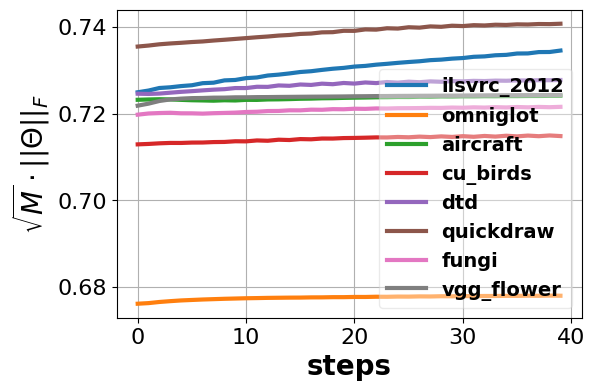

In [6]:
SAVE_ROOT = os.path.join(os.getcwd(), "figs")

data_path = os.path.join(os.getcwd(), "param_norms.npy")
data_dict = read_data(data_path)

dataset_list = list(data_dict.keys())

font_dict = {"weight": "bold", "size": 20}
legend_font = {"weight": "bold", "size": 14}
plt.figure(figsize=(6, 4))
           
for dataset in dataset_list:
    norms = np.array(data_dict[dataset]["upper_coef"]).mean(axis=0)
    steps = list(range(len(norms)))
    
    plt.plot(steps, norms, label=dataset, linewidth=3)

# axes
plt.xlabel("steps", fontdict=font_dict)
plt.ylabel("$\sqrt{M}\cdot||\Theta||_F$", fontdict=font_dict)
ax = plt.gca()
ax.tick_params(labelsize=16)

# grid
plt.grid(axis="both")

# legend
plt.legend(prop=legend_font, framealpha=0.4)

# save
if not os.path.exists(SAVE_ROOT):
    os.makedirs(SAVE_ROOT)
fig_name = "vary_l2_norm.pdf"
plt.savefig(os.path.join(SAVE_ROOT, fig_name), dpi=300, bbox_inches="tight")

plt.show()
plt.close()

